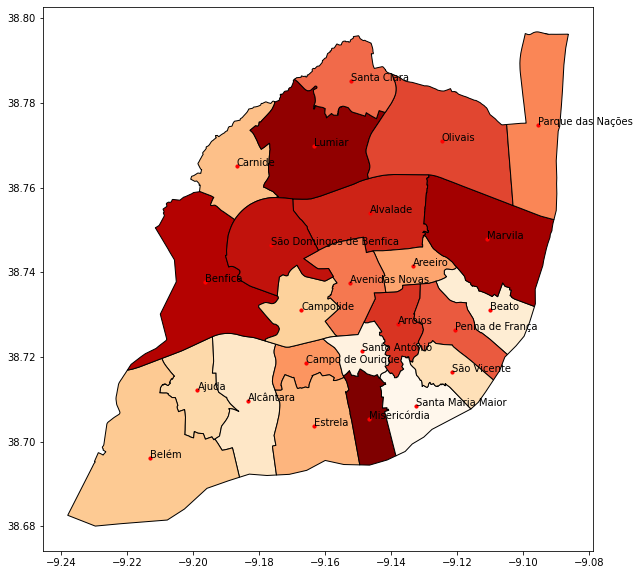

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import geometry
from shapely.geometry import Polygon, LineString, Point
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import plotly.graph_objects as go
import mpld3 as mp
import os


%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)


df_places = gpd.read_file('./Lisboa.geojson')



axis=df_places.plot(cmap='OrRd', edgecolor='black', column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE")


for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y)) 






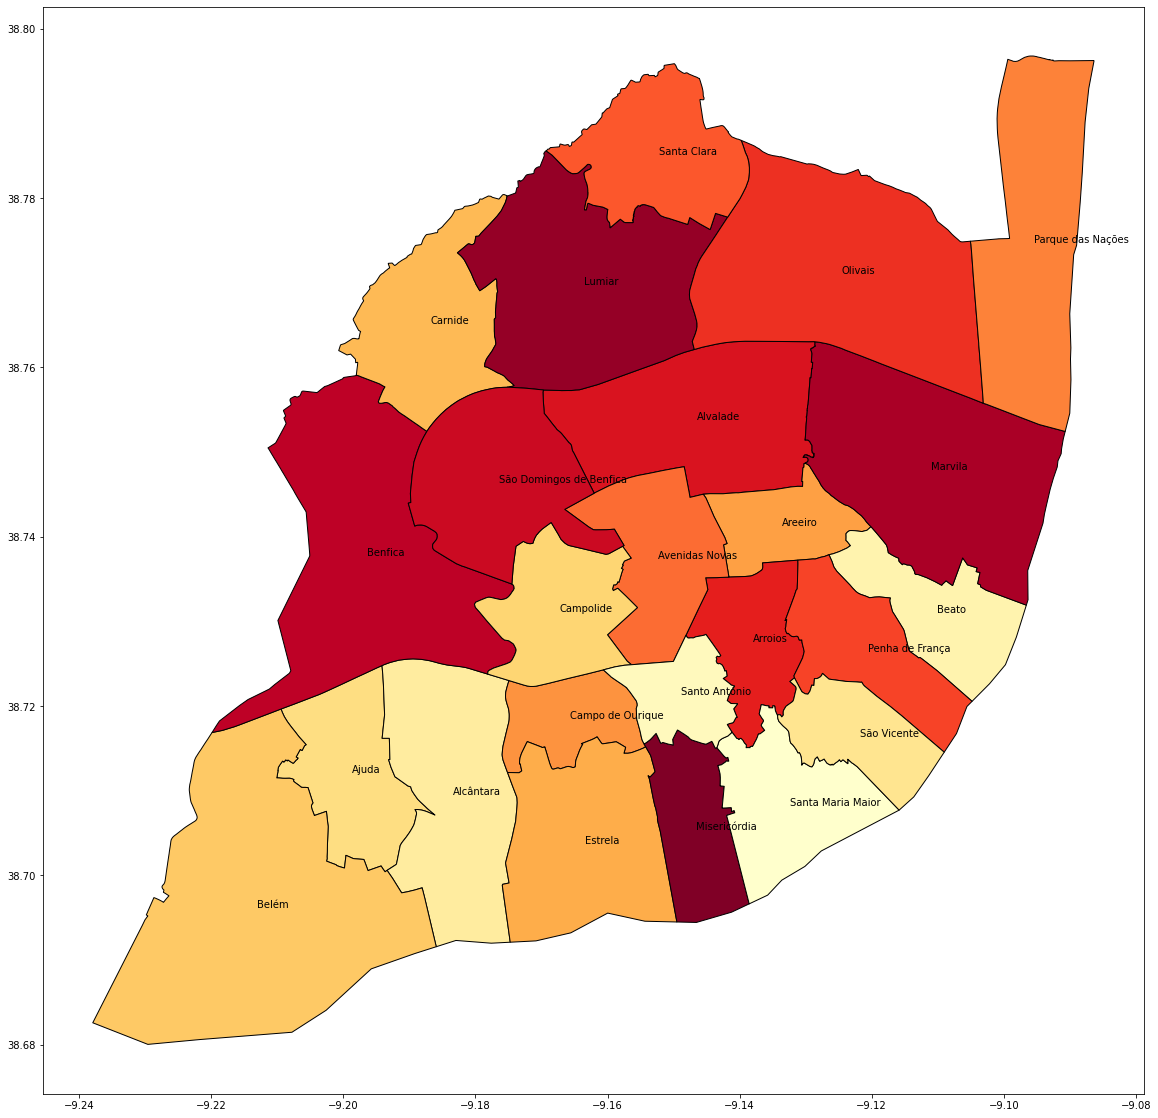

In [2]:
from shapely import geometry

axis = df_places.plot(edgecolor = "black",
                      figsize = (40,20), 
                      column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE",
                       cmap= "YlOrRd")

for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  

#df_places.plot(ax=ax, color='green')


# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
#axis.set_aspect('equal')

#df_places.plot(ax=axis, color='white', edgecolor='black')

#.plot(ax=ax, marker='o', color='red', markersize=5)

#plt.show()

4


AttributeError: 'int' object has no attribute 'plot'

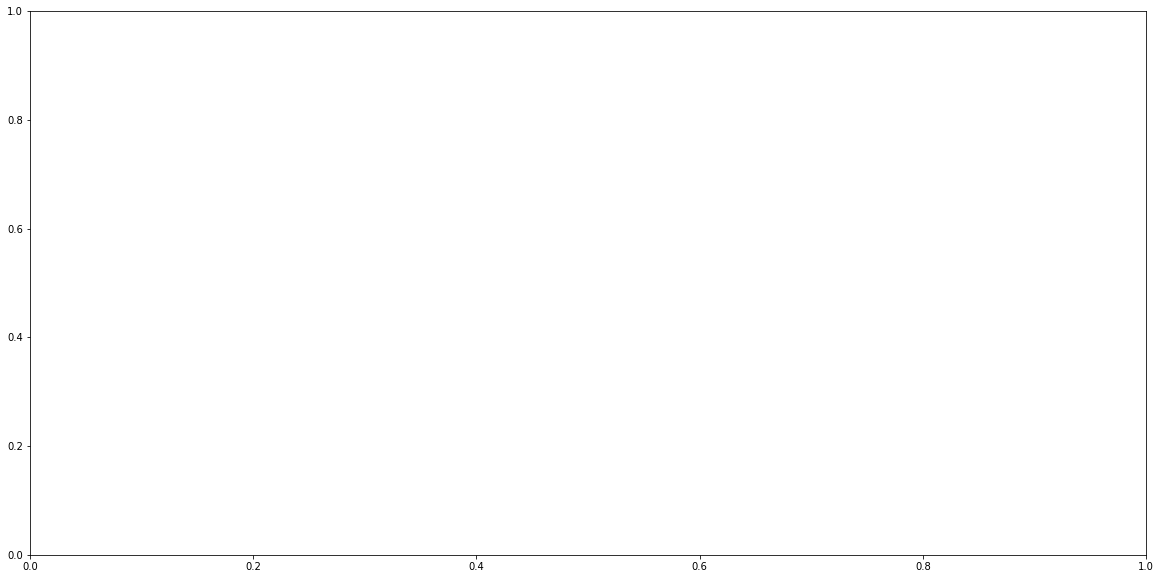

In [3]:
directory = "./archives"
ext = ".geojson"
lista=[1,2,3,4]
listadirs=[]
dic={}


#function to filter the name of file 
def leitura(filtro):
    i=0
    global lista, listadirs, dic
    listafiles=[]
    for root, dirs, files in os.walk(directory):
        if len(dirs) > 0:
            listadirs = dirs

        if len(files) > 0:
            for value in files:
                listafiles.append(root.replace("/", "\\")+"\\"+value.replace("/","\\"))

            dic[listadirs[i]] = listafiles
            listafiles = []
            i+=1    
        
        for file in files:
            if file.endswith(ext):
                if filtro is not None:
                    if filtro.find(file.replace(".geojson","")) != -1:
                        ficheiro = os.path.join(root, file)
                        lista.append(gpd.read_file(ficheiro))

#useless
def pprint():
    for k,v in dic.items():
        print(k+":")
        for value in v:
            print("       "+ value)


    


print(len(lista))
a = input("Quais os filtros que deseja:")
leitura(a)

fig, ax = plt.subplots()
lista[0].plot(ax=ax, color ="black", zorder=2)
axis = df_places.plot(ax=ax, color="lightblue",edgecolor = "black", zorder=1)

for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y)) 

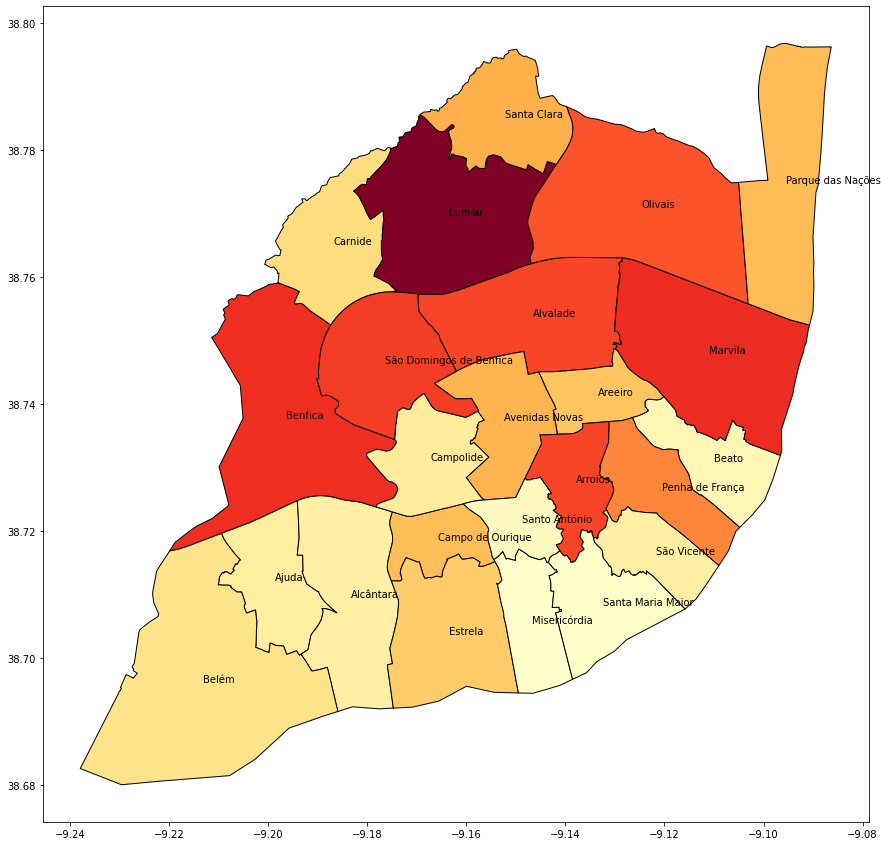

In [ ]:
from shapely import geometry
from mpl_toolkits.axes_grid1 import make_axes_locatable



listapop = []
fig, ax = plt.subplots(1, 1, figsize = (30,15))

df_places.explore(column='Censos 2021 População Lisboa_POPULACAO RESIDENTE',cmap='Set2')

for idx, row in df_places.iterrows():
    listapop.append(row['Censos 2021 População Lisboa_POPULACAO RESIDENTE'])
    
for a in range(0, len(listapop)):
    listapop[a] = int(listapop[a])
    
df_places["Censos 2021 População Lisboa_POPULACAO RESIDENTE"] = listapop
    

#df_places = df_places[(df_places["Censos 2021 População Lisboa_POPULACAO RESIDENTE"]!=9660) & (df_places.NOME!=None)]

"""axis = df_places.plot( 
                      column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE", 
                      edgecolor = "black", 
                      legend = True, 
                      cmap='YlGnBu_r',
                      legend_kwds={'label': "Population",
                        'orientation': "vertical"},
                      ax=ax,
                      tooltip=['nome','Censos 2021 População Lisboa_POPULACAO RESIDENTE'])"""

axis = df_places.plot( 
                      column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE", 
                      edgecolor = "black", 
                      legend = False, 
                      cmap='YlOrRd',
                      legend_kwds={'label': "Population",
                        'orientation': "vertical"},
                      ax=ax
                      )


for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  



In [ ]:
df_places.explore(column='Censos 2021 População Lisboa_POPULACAO RESIDENTE',cmap='OrRd')



In [ ]:
#for a in df_places.NOME:
    #print(a)
    
    
    
#for b in lista[0]:
        #print(b)
        




unique_list = []
count = []
dic = {}

 
    

#unique_list.append("Ajuda")





i = 1
'''for a in x:
    if a not in unique_list:
        unique_list.append(a)

for a in unique_list:
    numb = x.count(a)
    count.append(numb)'''
 

for idx, row in df_places.iterrows():
    
    dic[row.NOME] = row.geometry
    
for idx, row in lista[0].iterrows():
    #if type(row["geometry"]) != "NoneType":
        for idx1, row1 in df_places.iterrows():
            #print(type(row.geometry))
            #print(type(row1.geometry))
            if row.geometry.intersects(row1.geometry) == True:
                count.append(row1.NOME)
                

lista[0]
            

print(count)
    
#for k, v in dic.items(): 
    #print(k, v)
    
    
    
    
#count.remove(count[24])
#unique_list.remove(unique_list[24])

#print(unique_list)
#print(count)


#df_places.NOME=sorted(df_places.NOME)
#df_places.NOME=count

#ax = lista[0].plot(edgecolor = "black", color ="lightblue", zorder =2)
#axis = df_places.plot(ax=ax, edgecolor = "black", column = df_places.NOME, cmap= "YlOrRd", zorder=1)

#df_places.NOME=unique_list

for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y), font ="Tahoma")  
#for a in lista:
    #a.plot(ax=ax, edgecolor='black', legend=True, column = a.FRE_AB, cmap= "YlOrRd")

['Benfica', 'Lumiar', 'Arroios', 'Belém', 'São Domingos de Benfica', 'Avenidas Novas', 'Beato', 'Alvalade', 'São Vicente', 'Santa Clara', 'Avenidas Novas', 'Benfica', 'Benfica', 'Benfica', 'Beato', 'Estrela', 'Ajuda', 'Olivais', 'Ajuda', 'Lumiar', 'Misericórdia', 'Benfica', 'Lumiar', 'Penha de França', 'Belém', 'Arroios', 'Estrela', 'Arroios', 'Beato', 'Santo António', 'Alcântara', 'Arroios', 'Olivais', 'Belém', 'Areeiro', 'Belém', 'Arroios', 'Lumiar', 'Arroios', 'Alvalade', 'Benfica', 'Penha de França', 'Alvalade', 'Alcântara', 'Santo António', 'São Domingos de Benfica', 'Beato', 'Benfica', 'Benfica', 'Marvila', 'Marvila', 'Santa Clara', 'Santo António', 'Campolide', 'Lumiar', 'Ajuda', 'Olivais', 'Misericórdia', 'Misericórdia', 'Belém', 'Ajuda', 'Arroios', 'Olivais', 'Misericórdia', 'Santa Maria Maior', 'Alcântara', 'Belém', 'Benfica', 'Benfica', 'São Domingos de Benfica', 'Campo de Ourique', 'Campolide', 'Campolide', 'Santa Clara', 'Santa Clara', 'Carnide', 'Avenidas Novas', 'Beato',

In [ ]:
s = Polygon([(0, 0), (2, 2), (0, 2)])

s2 = gpd.GeoSeries(
    [
        Polygon([(0, 0), (1, 1), (0, 1)]),
        LineString([(1, 0), (1, 3)]),
        LineString([(2, 0), (0, 2)]),
        Point(1, 1),
        Point(0, 1),
    ],
    index=range(1, 6),
)

line = LineString([(-1, 1), (3, 1)])
s.intersects(line)

True

['ambiente', 'culturalazer', 'economia', 'educacao', 'saude', 'seguranca', 'transportes']


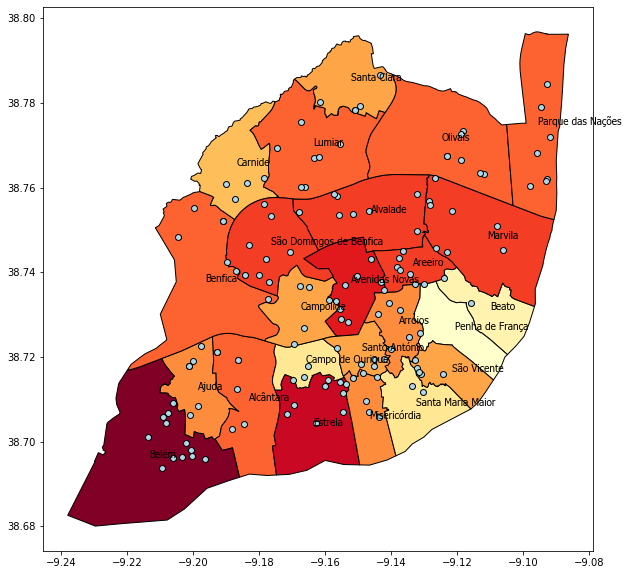

In [ ]:
listafilter = []
listafilted= []
count = []
number = []

df_places.NOME=sorted(df_places.NOME)

for idx, row in lista[0].iterrows():
    listafilter.append(row.geometry)
    
for ele in listafilter:
    if ele != None:
        listafilted.append(ele)


#if type(row["geometry"]) != "NoneType":
for a in listafilted:
    for idx1, row1 in df_places.iterrows():
            #print(type(row.geometry))
            #print(type(row1.geometry))
            if a.intersects(row1.geometry) == True:
                count.append(row1.NOME)


for a in df_places.NOME:
    numb = count.count(a)
    number.append(numb) 
               
for a in range(0, len(number)):
    number[a] = int(number[a])

soma=0
listadiv = []
for a in number:
    soma+=a

for a in number:
    listadiv.append(a/soma)


print(listadirs)
df_places.GlobalID=number

ax = lista[0].plot(edgecolor = "black", color ="lightblue", zorder =2)
axis = df_places.plot(ax=ax, edgecolor = "black", column = df_places.GlobalID, cmap= "YlOrRd", zorder=1)



for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y), font ="Tahoma")  
                

    

ambiente


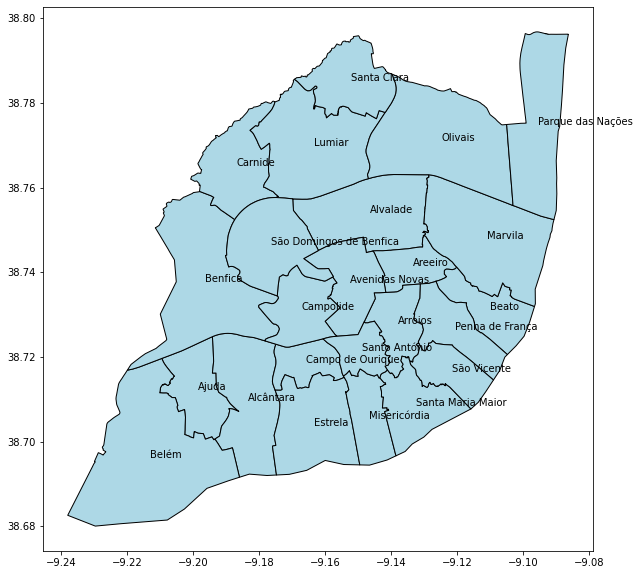

In [ ]:
filtrolist= []

def leitura(filtro):
    i=0
    global lista, listadirs, dic
    listafiles=[]
    for root, dirs, files in os.walk(directory):
        
        if len(dirs) > 0:
            listadirs = dirs

        if len(files) > 0:
            for value in files:
                listafiles.append(root.replace("/", "\\")+"\\"+value.replace("/","\\"))

            dic[listadirs[i]] = listafiles
            listafiles = []
            i+=1    
        
        for file in files:
            if file.endswith(ext):
                if filtro is not None:
                    if filtro.find(file.replace(".geojson","")) != -1:
                        ficheiro = os.path.join(root, file)
                    
                        lista.append(gpd.read_file(ficheiro))

def pprint():
    for k,v in dic.items():
        if listadirs[0].find(k) != -1:
            print(k)
    
 


pprint()



leitura(None)

#a = input("Quais os filtros que deseja:")
leitura(a)

    
fig, ax = plt.subplots(1,1)

ax.set_aspect('equal')
axis = df_places.plot(ax=ax, color="lightblue",edgecolor = "black")
for idx, row in df_places.iterrows():
 
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

  
    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  
plt.show()

In [ ]:
folderpathcomplete = listadirs[0]
str = "Jardins-Parques-urbanos.geojson"
leno = str(len(str))
lastindexof = folderpathcomplete.find(str)
pos = lastindexof + leno
folderpathcomplete[0:pos+1]


TypeError: 'int' object is not callable

TypeError: 'GeoDataFrame' object is not callable

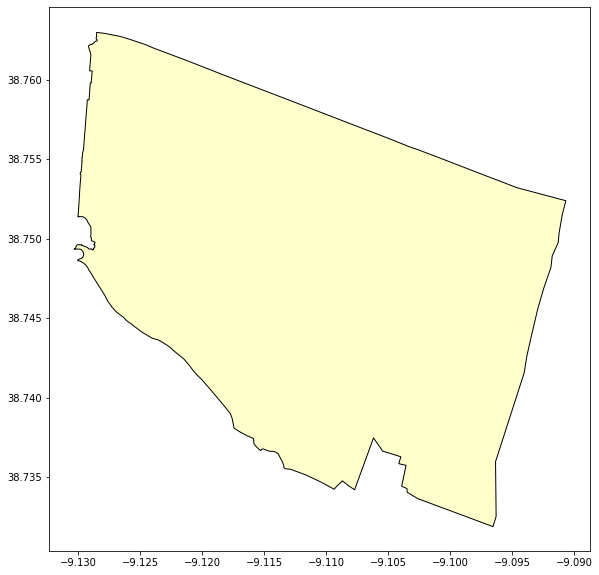

In [ ]:
region = "Marvila"
benfica = df_places[df_places.NOME == region]

bf = benfica.plot(column = benfica.GlobalID, edgecolor='black', cmap= "YlOrRd") 
df_places(ax=bf)

for idx, row in benfica.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    bf.annotate(row["NOME"], xy=(x, y), xytext=(x, y), font ="Tahoma") 
    





In [ ]:
df_places.loc["geometry"]

KeyError: 'geometry'

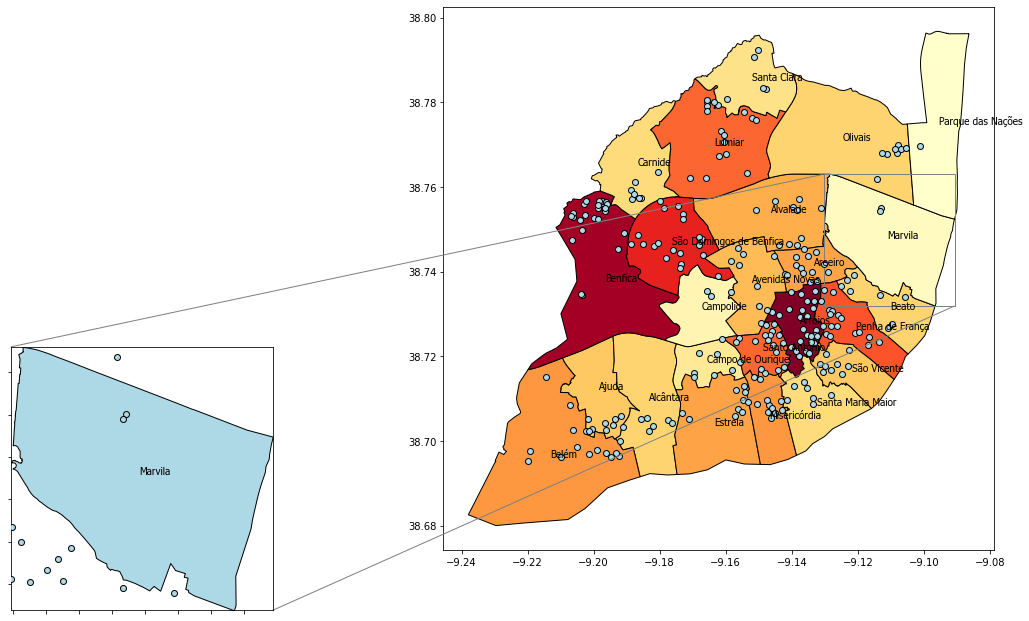

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


fig,ax=plt.subplots(1,1)

bound = benfica.bounds
# State layer
lista[0].plot(ax=ax, edgecolor = "black", color ="lightblue", zorder =3)
axis = df_places.plot(ax=ax, edgecolor = "black", column = df_places.GlobalID, cmap= "YlOrRd", zorder=1)
#axis = df_places.plot(ax=ax, edgecolor='black', color = 'lightblue', zorder=1)


axins = zoomed_inset_axes(axis, 2, loc='lower left', bbox_to_anchor=(0,0), borderpad=3)
# axins2 = zoomed_inset_axes(axis, 2, loc='lower left', bbox_to_anchor=(0,0), borderpad=3)

#print(bound["minx"])
minx,miny,maxx,maxy = benfica.total_bounds
axins.set_xlim(minx, maxx)
axins.set_ylim(miny, maxy)

minx,miny,maxx,maxy =  lista[0].total_bounds
# axins2.set_xlim(minx, maxx)
# axins2.set_ylim(miny, maxy)

lista[0].plot(ax=axins, edgecolor = "black", color ="lightblue", zorder =3)
bf = benfica.plot(ax=axins, edgecolor='black', color = 'lightblue', zorder = 2)
#df_places.plot(ax=axins2, edgecolor='black', color = 'white')
# Plot zoom window


mark_inset(ax, axins,  loc1=2, loc2=4, fc="none", ec="0.5")
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
#

for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y), font ="Tahoma")  
    
for idx, row in benfica.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    bf.annotate(row["NOME"], xy=(x, y), xytext=(x, y), font ="Tahoma")    
    

plt.show()
#ax.set_axis_off()


In [ ]:
a = df_places[df_places.NOME == "Benfica"].bounds

print(type(a))
print(type(df_places))


<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


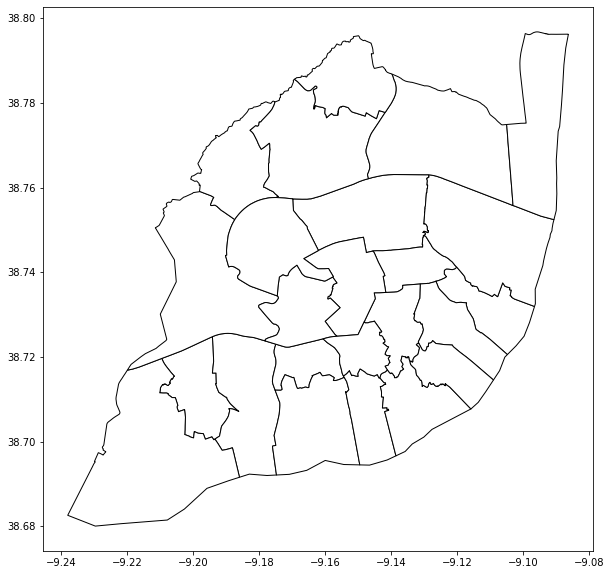

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# State layer
df_places.plot(ax=ax, edgecolor='black', color = 'white')

plt.show()

AttributeError: 'PatchCollection' object has no property 'axis'

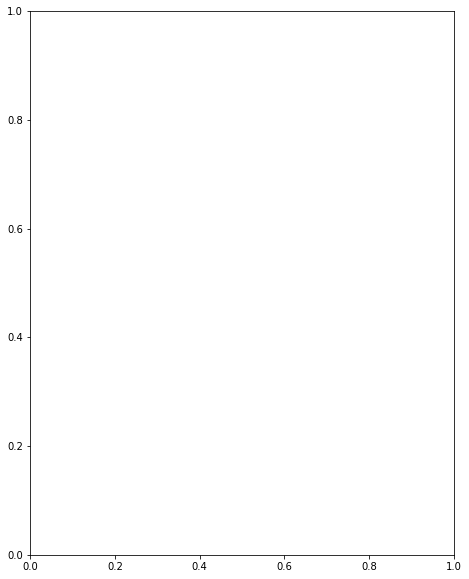

In [ ]:
import io
import plotly.express as px

fig = df_places.plot(axis=axis, edgecolor='black', color = 'white')
html_str = mp.fig_to_html(fig)
html_file= open("index.html","w")
html_file.write(html_str)
html_file.close()

C:\Users\gabri\AppData\Local\Temp\ipykernel_15088\2391475341.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


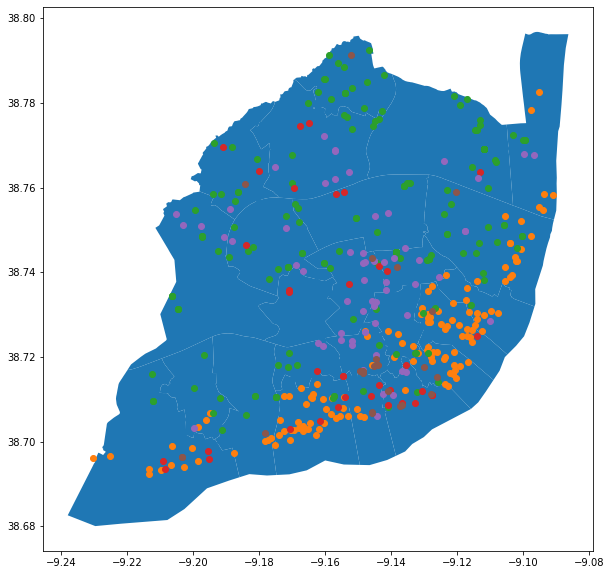

In [ ]:
b=True
c=0
while b:
    
    a = input("Insira os diretorios: ")
    leitura(a)
    if a == "":
        b=False


fig, ax=plt.subplots()
for a in lista:
    c+=1
    a.plot(ax=ax, zorder=c)

axis = df_places.plot(ax=ax)

fig.show()